# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [458]:
# Import warnings

import warnings
warnings.filterwarnings("ignore")


In [460]:
# Import the libraries you will be using for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [462]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [466]:
# Try loading one file

df = pd.read_parquet('/Users/sumit/Downloads/Starter Notebook - EDA NYC Taxi/content/trip_records/2023-1.parquet')
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3    1.0      0.5         0.0           0.0   
1             1          7.9    1.0      0.5         4.0           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0          14.3                   2.5          0.0  
1                    1.0          16.9                   2.5          0.0

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [473]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [475]:
# from google.colab import drive
# drive.mount('/content/drive')

In [477]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/Users/sumit/Downloads/Starter Notebook - EDA NYC Taxi/content/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file

        file_df = pd.read_parquet(file_path)

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        file_df["tpep_pickup_datetime"] = pd.to_datetime(file_df["tpep_pickup_datetime"])
        
    
        file_df["date"] = file_df["tpep_pickup_datetime"].dt.date
        file_df["hour"] = file_df["tpep_pickup_datetime"].dt.hour
        file_df = file_df[file_df["tpep_pickup_datetime"].dt.year == 2023]
       
        daily_sampled_df = pd.DataFrame()
        
        
        for date in file_df["date"].unique():
            
            daily_data = file_df[file_df["date"] == date]
            
            for hour in daily_data["hour"].unique():
                hourly_data = daily_data[daily_data["hour"] == hour]
                sampled_hourly_data = hourly_data.sample(frac=0.05, random_state=42)
                daily_sampled_df = pd.concat([daily_sampled_df, sampled_hourly_data])
               
        sampled_data = pd.concat([daily_sampled_df, sampled_data])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([sampled_data, df])# we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [480]:
# Store the df in csv/parquet
df.to_parquet('sample.parquet')


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [484]:
# Load the new data file
df = pd.read_parquet("sample.parquet")


In [485]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
224          2  2023-06-01 00:09:00   2023-06-01 00:17:41              1.0   
560          1  2023-06-01 00:25:01   2023-06-01 00:35:10              1.0   
1372         1  2023-06-01 00:27:25   2023-06-01 00:31:45              1.0   
198          2  2023-06-01 00:01:42   2023-06-01 00:12:40              1.0   
29           2  2023-06-01 00:48:01   2023-06-01 00:51:57              1.0   

      trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
224            1.91         1.0                  N           230   
560            2.10         1.0                  N           142   
1372           1.30         1.0                  N            79   
198            2.14         1.0                  N           163   
29             0.46         1.0                  N           162   

      DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
224            237             1  ...      0.5        3.28           0.0   
560            236             1  ...      0.5        2.00           0.0   
1372           137             2  ...      0.5        0.00           0.0   
198            263             1  ...      0.5        3.56           0.0   
29             233             2  ...      0.5        0.00           0.0   

      improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
224                     1.0         19.68                   2.5          0.0   
560                     1.0         19.10                   2.5          0.0   
1372                    1.0         12.90                   2.5          0.0   
198                     1.0         21.36                   2.5          0.0   
29                      1.0         10.80                   2.5          0.0   

            date  hour airport_fee  
224   2023-06-01     0         NaN  
560   2023-06-01     0         NaN  
1372  2023-06-01     0         NaN  
198   2023-06-01     0         NaN  
29    2023-06-01     0         NaN  

[5 rows x 22 columns]

In [488]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1996076 entries, 224 to 3196303
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            fl

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [492]:
# Fix the index and drop any columns that are not needed

df = df.drop(columns=["date", "hour","store_and_fwd_flag"])
df = df.reset_index(drop=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [495]:
# Combine the two airport fee columns
df["Airport_Fee_Final"] = df["Airport_fee"].combine_first(df["airport_fee"])
df = df.drop(columns=["Airport_fee", "airport_fee"])
df = df.rename(columns={"Airport_Fee_Final": "airport_fee"})

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [498]:
# check where values of fare amount are negative

df.info()

df[df["fare_amount"] <= 0].shape[0]

# df[df["fare_amount"] > 0].shape[0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996076 entries, 0 to 1996075
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
dtypes: datetime64[us](2), 

681

Did you notice something different in the `RatecodeID` column for above records?

In [501]:
# Analyse RatecodeID for the negative fare amounts
df[df["RatecodeID"] < 0].shape[0]

0

In [503]:
# Find which columns have negative values
numeric_cols = df.select_dtypes(exclude=['datetime','object']).columns
numeric_cols
negative_columns = df[numeric_cols].lt(0).any()
negative_columns = negative_columns[negative_columns].index.tolist()
negative_columns


['extra',
 'mta_tax',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

In [505]:
# fix these negative values

columns = ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

negative_counts = (df[columns] < 0).sum()

print(negative_counts)

#fix negative values
df = df[~(df[columns] < 0).any(axis=1)]

negative_counts = (df[columns] < 0).sum()

print(negative_counts)

extra                     3
mta_tax                  74
improvement_surcharge    79
total_amount             79
congestion_surcharge     56
airport_fee              15
dtype: int64
extra                    0
mta_tax                  0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [509]:
# Find the proportion of missing values in each column
missing_proportion = df.isna().mean()
print(missing_proportion)


VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.034348
trip_distance            0.000000
RatecodeID               0.034161
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.034348
airport_fee              0.034169
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [512]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df[df["passenger_count"].isna()].head(2)

df["passenger_count"] = df["passenger_count"].fillna(df["passenger_count"].mean().round())
df[df["passenger_count"].isna()].head(2)


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [516]:
# Fix missing values in 'RatecodeID'
df["RatecodeID"]  = df["RatecodeID"].fillna(df["RatecodeID"].mode()[0])

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [519]:
# handle null values in congestion_surcharge

df["RatecodeID"] = df["RatecodeID"].fillna(0)



Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [522]:
# Handle any remaining missing values
df["airport_fee"] = df["airport_fee"].fillna(df["airport_fee"].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1995996 entries, 0 to 1996075
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
dtypes: datetime64[us](2), float

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

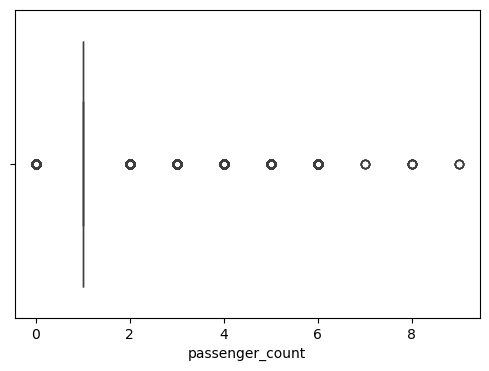

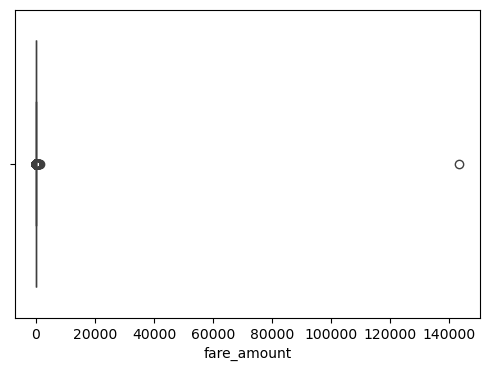

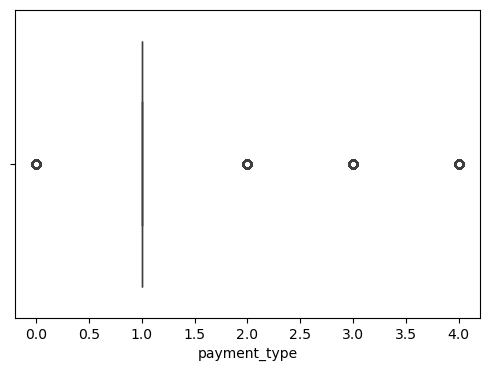

In [115]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["passenger_count"])
plt.show()

# Passenger Count where value is zero
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["fare_amount"])
plt.show()

# Payment type value analysis
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["payment_type"])
plt.show()


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [119]:
# remove passenger_count > 6
df = df[df["passenger_count"] <= 6]


In [525]:
# Continue with outlier handling
conditions = [
    (df["trip_distance"] < 0.1) & (df["fare_amount"] > 300),
    (df["trip_distance"] == 0) & (df["fare_amount"] == 0) & (df["PULocationID"] != df["DOLocationID"]),
    df["trip_distance"] > 250,
    df["payment_type"] == 0,
    df["fare_amount"] > 300,
    df["trip_distance"] <= 0,
    df["tip_amount"] > 300,
    df["passenger_count"] <= 0,
    ~df["payment_type"].isin([1, 2,3,4])
]

df = df[~pd.concat(conditions, axis=1).any(axis=1)].reset_index(drop=True)

print(f"Removed {sum(pd.concat(conditions, axis=1).any(axis=1))} invalid rows.")



Removed 122804 invalid rows.


In [527]:
# Do any columns need standardising?
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873192 entries, 0 to 1873191
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
dtypes: datetime64[us](2), 

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [530]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`:Can be used as both
* `tpep_dropoff_datetime`:Can be used as both
* `passenger_count`:Numerical
* `trip_distance`:Numerical
* `RatecodeID`:Categorical
* `PULocationID`:Categorical
* `DOLocationID`:Categorical
* `payment_type`:Categorical
* `pickup_hour`:Numerical
* `trip_duration`:Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`
This is numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

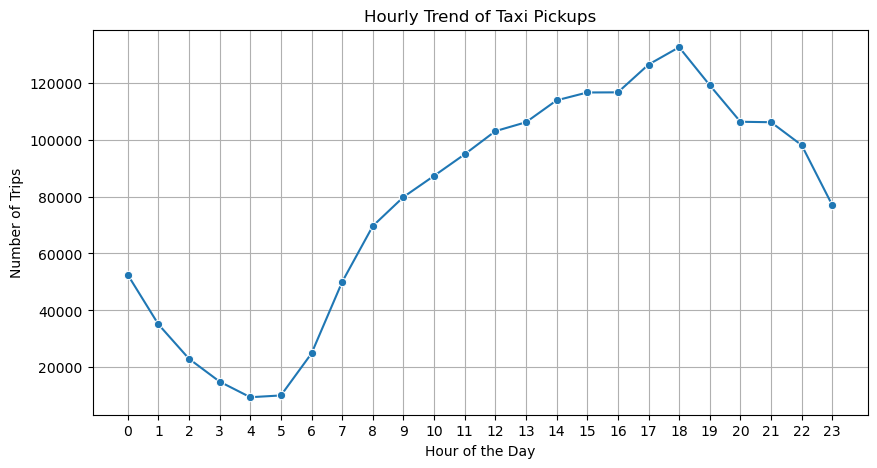

In [536]:
# Find and show the hourly trends in taxi pickups
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour

hourly_trend = df.groupby("pickup_hour").size()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_trend.index, y=hourly_trend.values, marker="o")

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Hourly Trend of Taxi Pickups")
plt.xticks(range(24))  # Show all hours from 0 to 23
plt.grid(True)

plt.show()


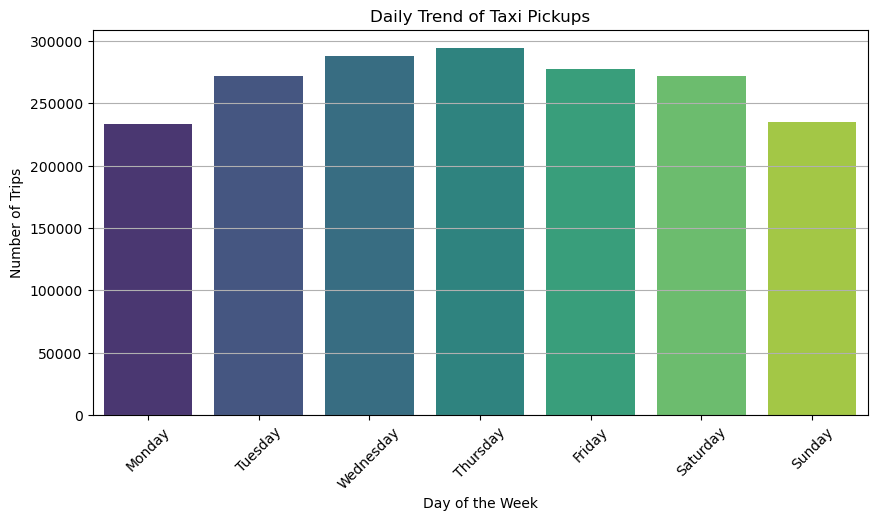

In [538]:
# Find and show the daily trends in taxi pickups (days of the week)

df["pickup_day"] = df["tpep_pickup_datetime"].dt.day_name()

daily_trend = df["pickup_day"].value_counts().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

plt.figure(figsize=(10, 5))
sns.barplot(x=daily_trend.index, y=daily_trend.values, palette="viridis")

plt.xlabel("Day of the Week")
plt.ylabel("Number of Trips")
plt.title("Daily Trend of Taxi Pickups")
plt.xticks(rotation=45)
plt.grid(axis="y")

plt.show()

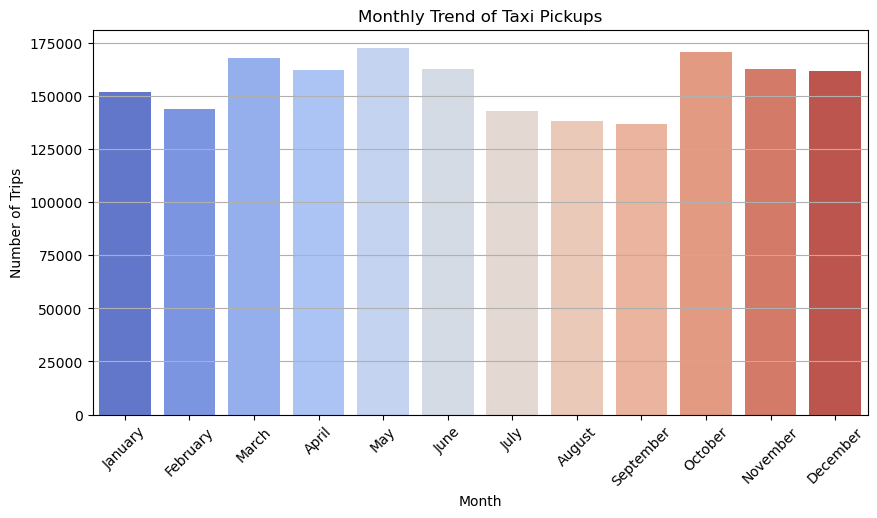

In [540]:
# Show the monthly trends in pickups

df["pickup_month"] = df["tpep_pickup_datetime"].dt.month_name()

monthly_trend = df["pickup_month"].value_counts().reindex([
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
])


plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_trend.index, y=monthly_trend.values, palette="coolwarm")

plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.title("Monthly Trend of Taxi Pickups")
plt.xticks(rotation=45)
plt.grid(axis="y")

plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [544]:
# Analyse the above parameters
financial_columns = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]


negative_values = df[financial_columns].lt(0).sum()
zero_values = df[financial_columns].eq(0).sum()

outliers_df = pd.DataFrame({"Negative Values": negative_values, "Zero Values": zero_values})
print(outliers_df)


               Negative Values  Zero Values
fare_amount                  0          255
tip_amount                   0       408692
total_amount                 0           74
trip_distance                0            0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [548]:
# Create a df with non zero entries for the selected parameters.
df_non_zero = df[(df[financial_columns] != 0).all(axis=1)]
df_non_zero.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-06-01 00:09:00   2023-06-01 00:17:41              1.0   
1         1  2023-06-01 00:25:01   2023-06-01 00:35:10              1.0   
3         2  2023-06-01 00:01:42   2023-06-01 00:12:40              1.0   
6         2  2023-06-01 00:11:07   2023-06-01 00:15:11              1.0   
7         2  2023-06-01 00:39:56   2023-06-01 01:05:28              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           1.91         1.0           230           237             1   
1           2.10         1.0           142           236             1   
3           2.14         1.0           163           263             1   
6           0.39         1.0           163           230             1   
7           8.76         1.0            90           116             1   

   fare_amount  ...  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0         11.4  ...      0.5        3.28           0.0                    1.0   
1         12.1  ...      0.5        2.00           0.0                    1.0   
3         12.8  ...      0.5        3.56           0.0                    1.0   
6          5.8  ...      0.5        2.16           0.0                    1.0   
7         38.7  ...      0.5        8.74           0.0                    1.0   

   total_amount  congestion_surcharge  airport_fee  pickup_hour  pickup_day  \
0         19.68                   2.5          0.0            0    Thursday   
1         19.10                   2.5          0.0            0    Thursday   
3         21.36                   2.5          0.0            0    Thursday   
6         12.96                   2.5          0.0            0    Thursday   
7         52.44                   2.5          0.0            0    Thursday   

  pickup_month  
0         June  
1         June  
3         June  
6         June  
7         June  

[5 rows x 21 columns]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

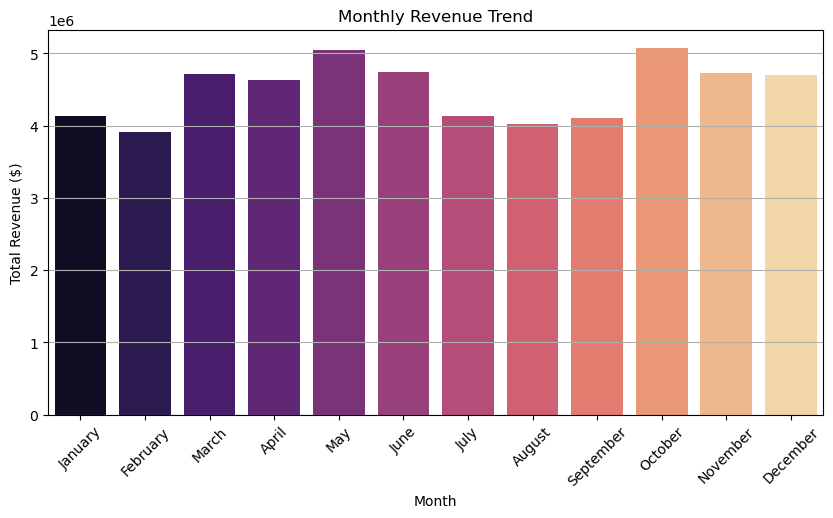

In [551]:
# Group data by month and analyse monthly revenue
monthly_revenue = df.groupby("pickup_month")["total_amount"].sum().reindex([
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
])


plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette="magma")

plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.grid(axis="y")

plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

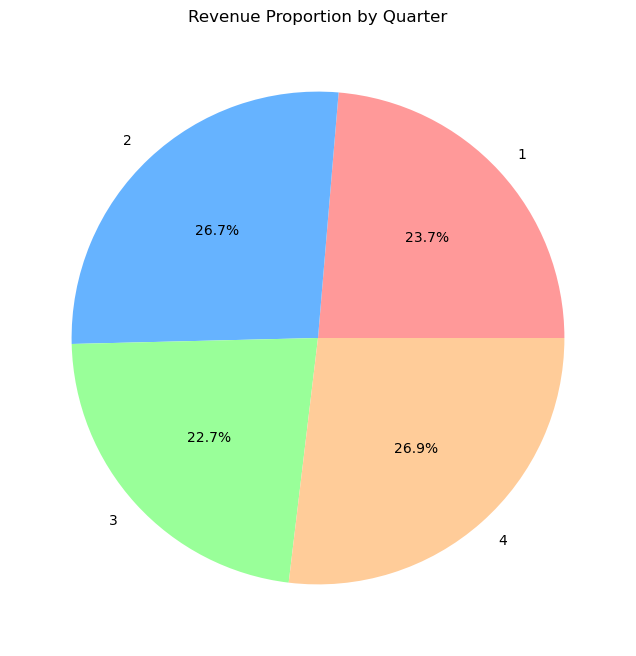

In [554]:
# Calculate proportion of each quarter
plt.figure(figsize=(8, 8))
plt.pie(quarterly_proportion, labels=quarterly_proportion.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title("Revenue Proportion by Quarter")
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

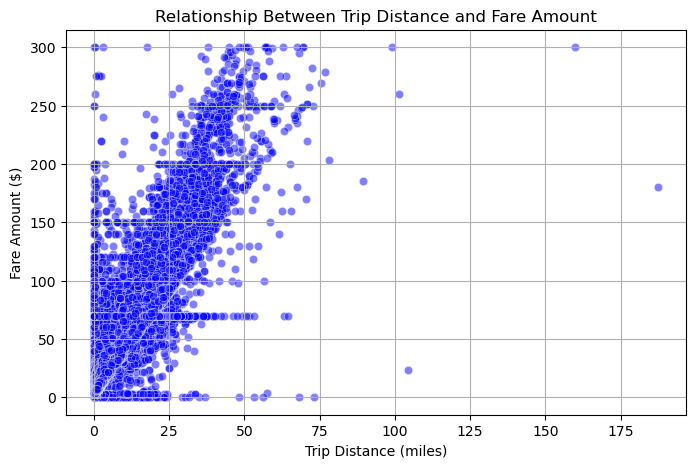

In [557]:
# Show how trip fare is affected by distance

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="trip_distance", y="fare_amount", alpha=0.5, color="blue")

plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title("Relationship Between Trip Distance and Fare Amount")
plt.grid()
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

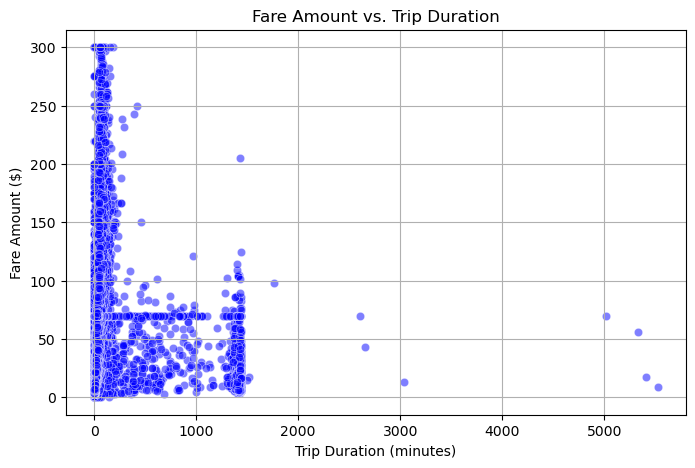

Correlation: 0.27


In [560]:
# Show relationship between fare and trip duration
df["trip_duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60
df_filtered = df[(df["trip_distance"] > 0) & (df["fare_amount"] > 0) & (df["trip_duration"] > 0)]
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_filtered, x="trip_duration", y="fare_amount", alpha=0.5, color="blue")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.title("Fare Amount vs. Trip Duration")
plt.grid()
plt.show()

print(f"Correlation: {df_filtered['trip_duration'].corr(df_filtered['fare_amount']):.2f}")



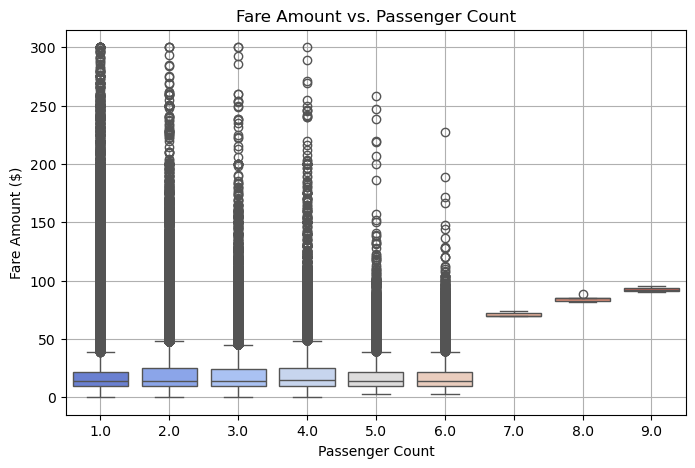

Correlation: 0.04


In [562]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_filtered, x="passenger_count", y="fare_amount", palette="coolwarm")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount ($)")
plt.title("Fare Amount vs. Passenger Count")
plt.grid()
plt.show()

print(f"Correlation: {df_filtered['passenger_count'].corr(df_filtered['fare_amount']):.2f}")



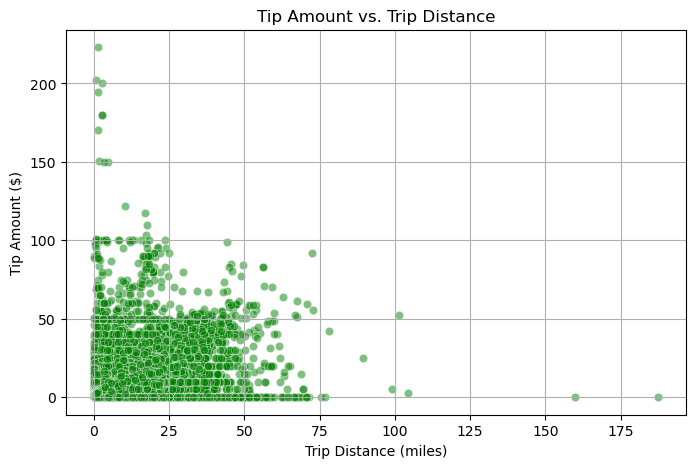

Correlation: 0.59


In [563]:
# Show relationship between tip and trip distance

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_filtered, x="trip_distance", y="tip_amount", alpha=0.5, color="green")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.title("Tip Amount vs. Trip Distance")
plt.grid()
plt.show()

print(f"Correlation: {df_filtered['trip_distance'].corr(df_filtered['tip_amount']):.2f}")


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

payment_type
1    1533191
2     320622
4      12787
3       6592
Name: count, dtype: int64


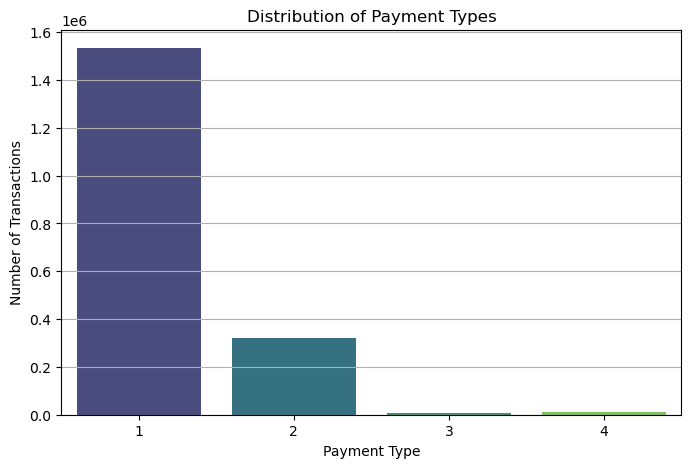

In [567]:
# Analyse the distribution of different payment types (payment_type).
payment_counts = df["payment_type"].value_counts()
print(payment_counts)

plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")

plt.xlabel("Payment Type")
plt.ylabel("Number of Transactions")
plt.title("Distribution of Payment Types")
plt.xticks(rotation=0)
plt.grid(axis="y")

plt.show()




- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [573]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [576]:
 import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file("/Users/sumit/Downloads/Starter Notebook - EDA NYC Taxi/content/taxi_zones/taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

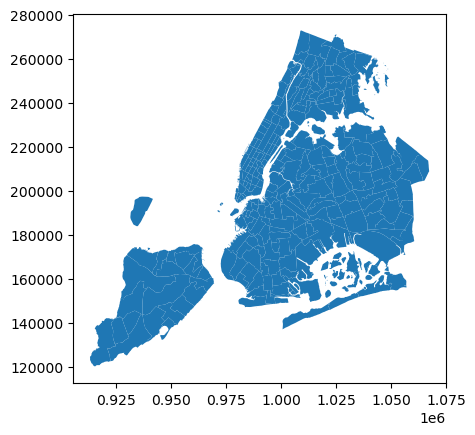

In [579]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [583]:
# Merge zones and trip records using locationID and PULocationID

df["PULocationID"] = df["PULocationID"].astype(int)
zones["LocationID"] = zones["LocationID"].astype(int)
merged_df = df.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")

print(merged_df.head())


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-06-01 00:09:00   2023-06-01 00:17:41              1.0   
1         1  2023-06-01 00:25:01   2023-06-01 00:35:10              1.0   
2         1  2023-06-01 00:27:25   2023-06-01 00:31:45              1.0   
3         2  2023-06-01 00:01:42   2023-06-01 00:12:40              1.0   
4         2  2023-06-01 00:48:01   2023-06-01 00:51:57              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           1.91         1.0           230           237             1   
1           2.10         1.0           142           236             1   
2           1.30         1.0            79           137             2   
3           2.14         1.0           163           263             1   
4           0.46         1.0           162           233             2   

   fare_amount  ...  pickup_day  pickup_month  trip_duration  OBJECTID  \
0         11.4  ...    Thursda

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [598]:
# Group data by location and calculate the number of trips
trip_counts = df.groupby("PULocationID")["PULocationID"].count().reset_index(name="total_trips")

trip_counts = trip_counts.merge(zones[["LocationID", "zone"]], left_on="PULocationID", right_on="LocationID", how="left")

trip_counts.drop(columns=["LocationID"], inplace=True)

print(trip_counts.sort_values(by="total_trips", ascending=False).head())



     PULocationID  total_trips                   zone
125           132        98949            JFK Airport
227           237        89463  Upper East Side South
154           161        88425         Midtown Center
226           236        79738  Upper East Side North
155           162        67582           Midtown East


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [605]:
# Merge trip counts back to the zones GeoDataFrame


trip_counts = df.groupby("PULocationID")["PULocationID"].count().reset_index(name="total_trips")


trip_counts = trip_counts.merge(zones[["LocationID", "zone"]], 
                                left_on="PULocationID", 
                                right_on="LocationID", 
                                how="left")


trip_counts.drop(columns=["LocationID"], inplace=True)


zones = zones.merge(trip_counts[["PULocationID", "total_trips"]], 
                    left_on="LocationID", 
                    right_on="PULocationID", 
                    how="left")


zones.drop(columns=["PULocationID"], inplace=True)


zones["total_trips"] = zones["total_trips"].fillna(0).astype(int)

print(zones.sort_values(by="total_trips", ascending=False).head())



MergeError: Passing 'suffixes' which cause duplicate columns {'total_trips_x'} is not allowed.

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

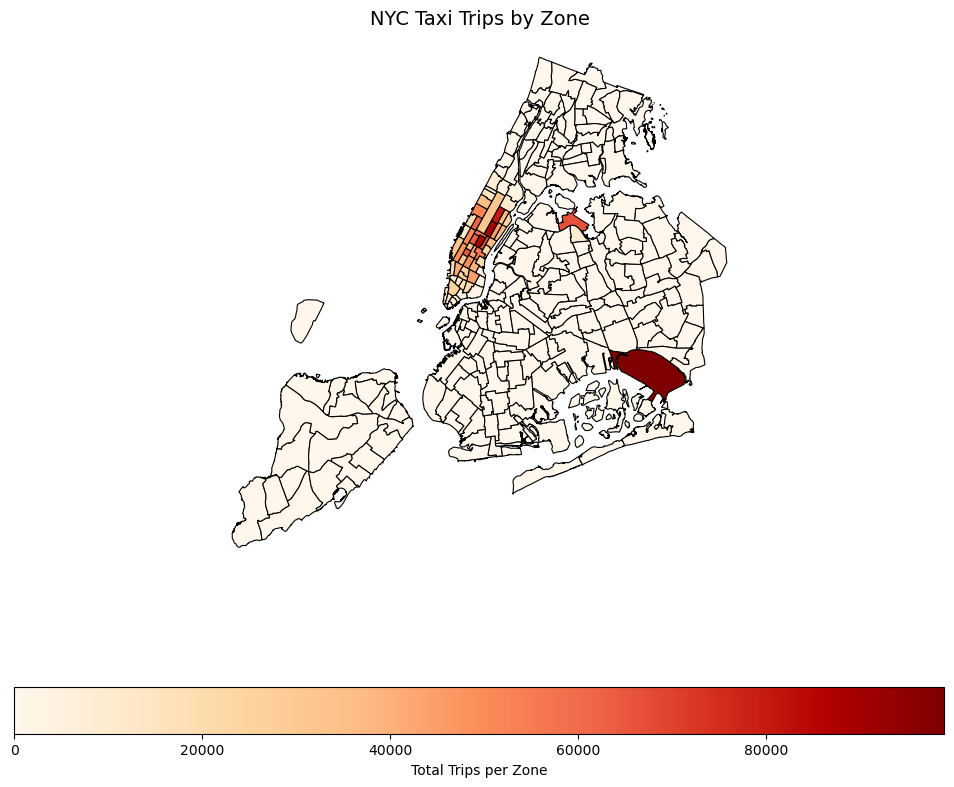

In [610]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))


zones.plot(column="total_trips",  
           cmap="OrRd",  # Color scheme (Oranges-Reds)
           linewidth=0.8,  # Border width
           edgecolor="black",  # Border color
           ax=ax,  
           legend=True,  
           legend_kwds={"label": "Total Trips per Zone", "orientation": "horizontal"})  
ax.set_title("NYC Taxi Trips by Zone", fontsize=14)

# Hide axes for better visualization
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

plt.show()

In [612]:
# can you try displaying the zones DF sorted by the number of trips?
# Sort the GeoDataFrame by total_trips in descending order
zones_sorted = zones.sort_values(by="total_trips", ascending=False)

# Display the top rows
print(zones_sorted.head(10))  # Show top 10 zones with highest trips


     OBJECTID  Shape_Leng  Shape_Area                          zone  \
145       132    0.245479    0.002038                   JFK Airport   
250       237    0.042213    0.000096         Upper East Side South   
174       161    0.035804    0.000072                Midtown Center   
249       236    0.044252    0.000103         Upper East Side North   
175       162    0.035270    0.000048                  Midtown East   
151       138    0.107467    0.000537             LaGuardia Airport   
199       186    0.024696    0.000037  Penn Station/Madison Sq West   
243       230    0.031028    0.000056     Times Sq/Theatre District   
155       142    0.038176    0.000076           Lincoln Square East   
183       170    0.045769    0.000074                   Murray Hill   

     LocationID    borough                                           geometry  \
145         132     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
250         237  Manhattan  POLYGON ((993633.442 216961.

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

                     Pickup_Zone           Dropoff_Zone  pickup_hour  \
83092              Midtown South       Brooklyn Heights            1   
43173    Greenwich Village South        Highbridge Park            1   
14770               Clinton West  Upper West Side South            1   
116879     Upper West Side North    UN/Turtle Bay South            1   
119477  Washington Heights South            Hunts Point           12   
97035      Soundview/Castle Hill              Bronxdale           11   
72508           Manhattan Valley               Gramercy            1   
43068    Greenwich Village South                Gowanus            1   
93733                  Ridgewood         Bushwick North            1   
40358                  Gravesend                    NaN           15   

        avg_speed_mph  
83092     -807.631579  
43173      -49.195021  
14770      -44.822660  
116879     -24.334589  
119477     -18.504673  
97035      -13.514077  
72508       -8.327645  
43068       -4.

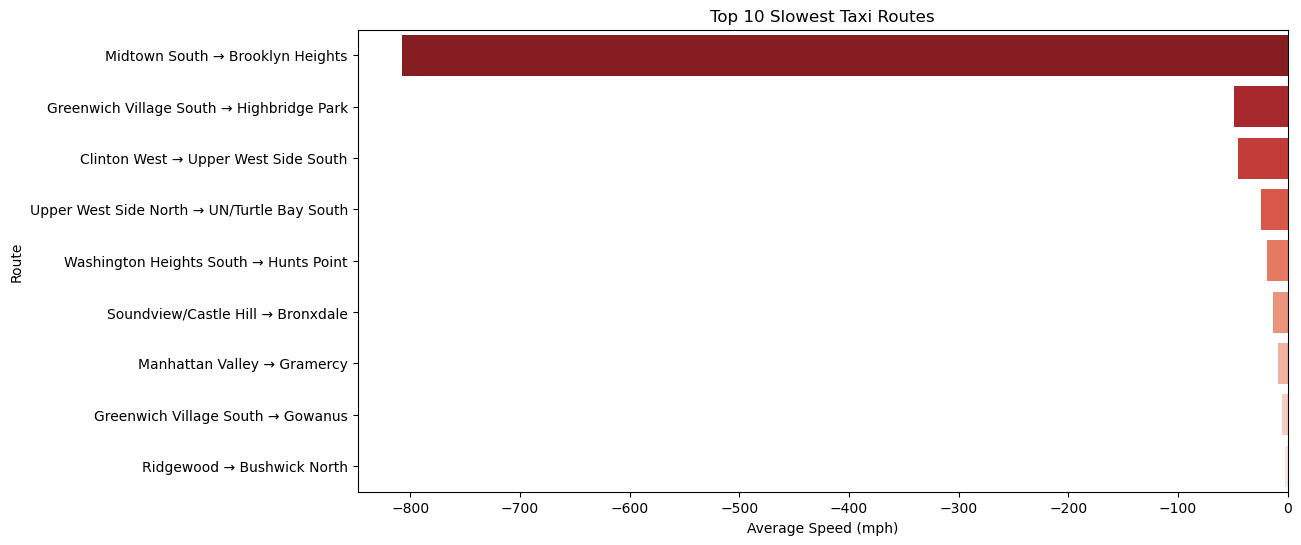

In [622]:
# Find routes which have the slowest speeds at different times of the day

df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour


df["trip_duration_hrs"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 3600


route_speed = df.groupby(["PULocationID", "DOLocationID", "pickup_hour"]).agg(
    avg_distance=("trip_distance", "mean"),
    avg_duration=("trip_duration_hrs", "mean")
).reset_index()

route_speed["avg_speed_mph"] = route_speed["avg_distance"] / route_speed["avg_duration"]
route_speed.replace([float('inf'), -float('inf')], 0, inplace=True)  # Handle infinite speeds


route_speed = route_speed.merge(zones[["LocationID", "zone"]], left_on="PULocationID", right_on="LocationID", how="left")
route_speed.rename(columns={"zone": "Pickup_Zone"}, inplace=True)
route_speed.drop(columns=["LocationID"], inplace=True)

route_speed = route_speed.merge(zones[["LocationID", "zone"]], left_on="DOLocationID", right_on="LocationID", how="left")
route_speed.rename(columns={"zone": "Dropoff_Zone"}, inplace=True)
route_speed.drop(columns=["LocationID"], inplace=True)

slow_routes = route_speed.sort_values(by="avg_speed_mph", ascending=True)


print(slow_routes.head(10)[["Pickup_Zone", "Dropoff_Zone", "pickup_hour", "avg_speed_mph"]])



top_slow_routes = slow_routes.head(10)


top_slow_routes["Route"] = top_slow_routes["Pickup_Zone"] + " → " + top_slow_routes["Dropoff_Zone"]


plt.figure(figsize=(12, 6))
sns.barplot(x="avg_speed_mph", y="Route", data=top_slow_routes, palette="Reds_r")

plt.xlabel("Average Speed (mph)")
plt.ylabel("Route")
plt.title("Top 10 Slowest Taxi Routes")

plt.show()


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

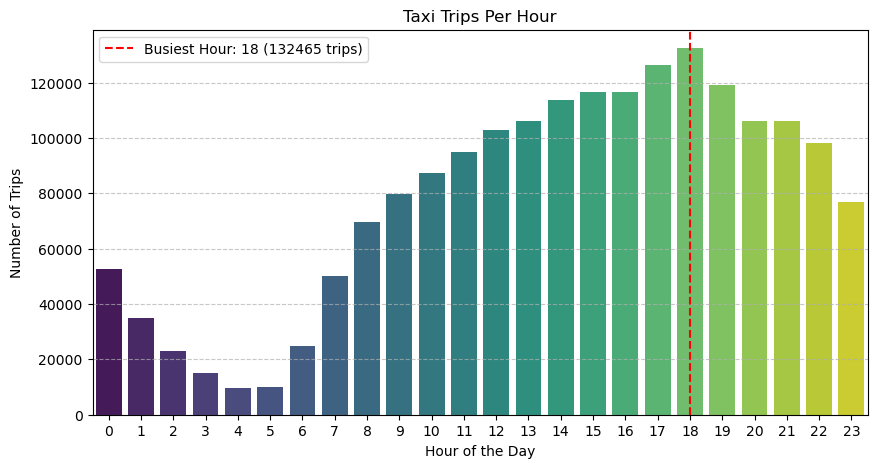

In [626]:
# Visualise the number of trips per hour and find the busiest hour
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour


hourly_trips = df["pickup_hour"].value_counts().sort_index()


busiest_hour = hourly_trips.idxmax()
busiest_trips = hourly_trips.max()


plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_trips.index, y=hourly_trips.values, palette="viridis")


plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Taxi Trips Per Hour")

plt.axvline(busiest_hour, color="red", linestyle="--", label=f"Busiest Hour: {busiest_hour} ({busiest_trips} trips)")
plt.legend()

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [630]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05

df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
hourly_trips = df["pickup_hour"].value_counts().sort_values(ascending=False)

top_5_busiest_hours = hourly_trips.head(5)

sample_fraction = sample_fraction
scaled_trips = (top_5_busiest_hours / sample_fraction).round().astype(int)

print("Top 5 Busiest Hours and Scaled Trip Counts:")
print(pd.DataFrame({"Sampled Trips": top_5_busiest_hours, "Scaled Trips": scaled_trips}))



Top 5 Busiest Hours and Scaled Trip Counts:
             Sampled Trips  Scaled Trips
pickup_hour                             
18                  132465       2649300
17                  126369       2527380
19                  119114       2382280
16                  116611       2332220
15                  116562       2331240


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

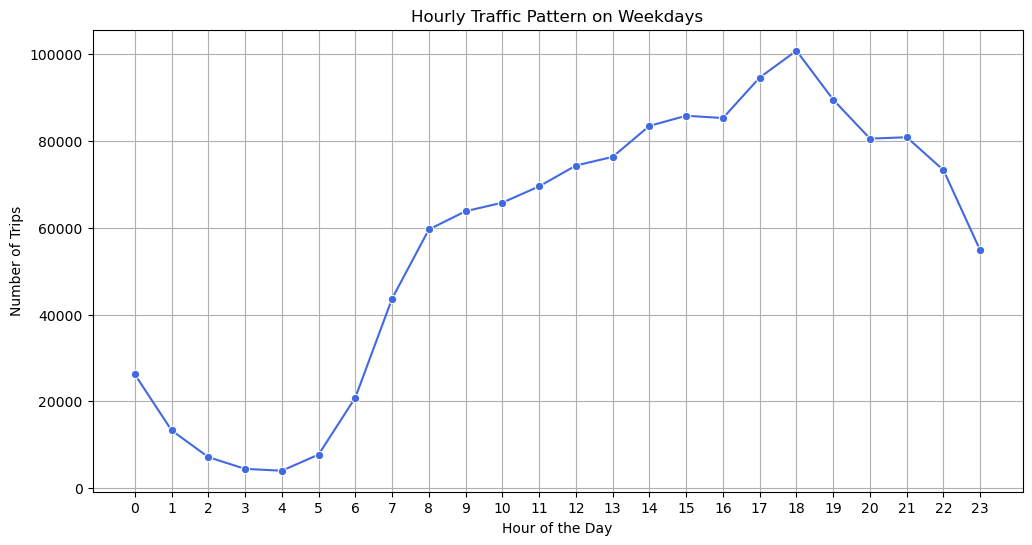

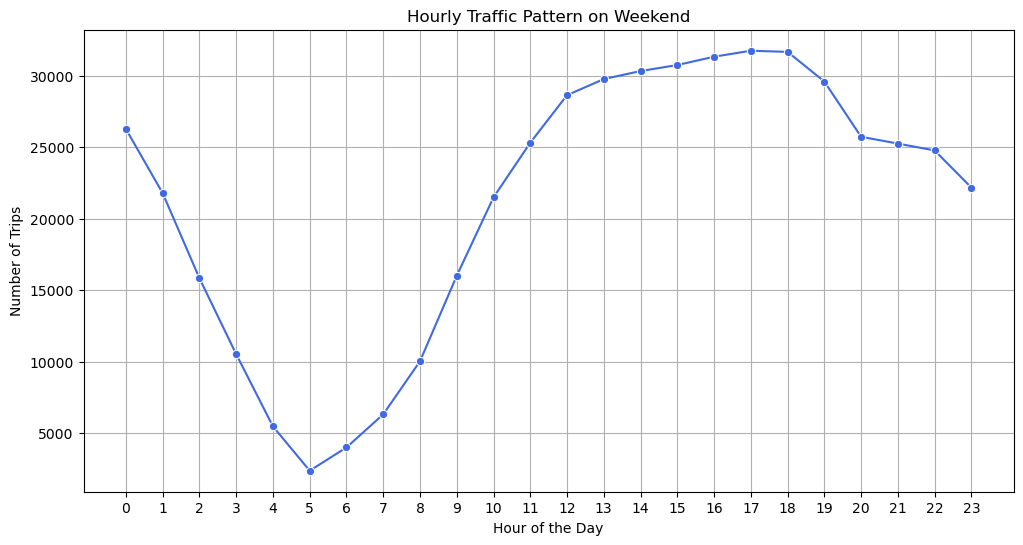

In [633]:
# Compare traffic trends for the week days and weekends

df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
df["pickup_day"] = df["tpep_pickup_datetime"].dt.dayofweek  # 0 = Monday, 6 = Sunday


weekday_df = df[df["pickup_day"] < 5]

hourly_weekday_trips = weekday_df.groupby("pickup_hour").size()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_weekday_trips.index, y=hourly_weekday_trips.values, marker="o", color="royalblue")

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Hourly Traffic Pattern on Weekdays")
plt.xticks(range(0, 24))
plt.grid()

plt.show()

weekday_df = df[df["pickup_day"] > 4]

hourly_weekday_trips = weekday_df.groupby("pickup_hour").size()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_weekday_trips.index, y=hourly_weekday_trips.values, marker="o", color="royalblue")

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Hourly Traffic Pattern on Weekend")
plt.xticks(range(0, 24))
plt.grid()

plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

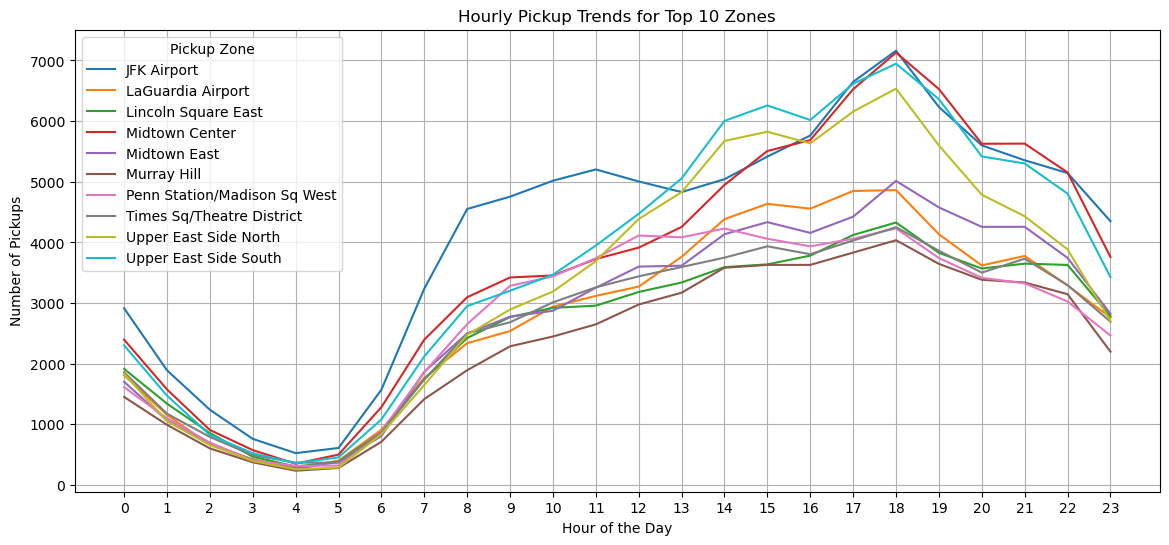

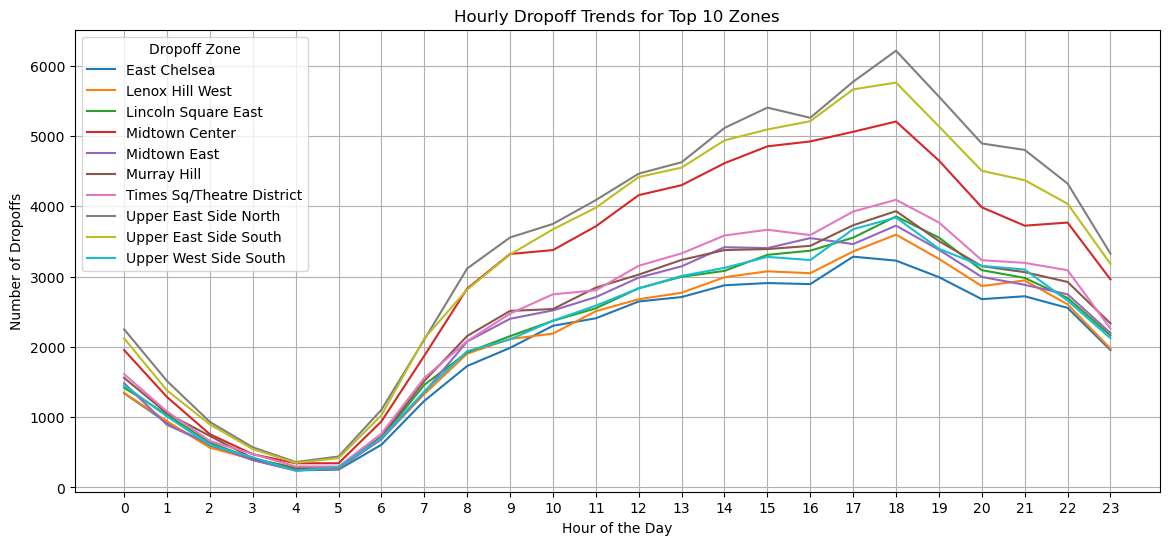

In [637]:
# Find top 10 pickup and dropoff zones

# Count trips per pickup location
pickup_zones = df[["PULocationID"]].merge(zones[["LocationID", "zone"]], left_on="PULocationID", right_on="LocationID", how="left")
dropoff_zones = df[["DOLocationID"]].merge(zones[["LocationID", "zone"]], left_on="DOLocationID", right_on="LocationID", how="left")


df["Pickup_Zone"] = pickup_zones["zone"]
df["Dropoff_Zone"] = dropoff_zones["zone"]


df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour

hourly_pickups = df.groupby(["Pickup_Zone", "pickup_hour"]).size().reset_index(name="trip_count")
hourly_dropoffs = df.groupby(["Dropoff_Zone", "pickup_hour"]).size().reset_index(name="trip_count")

top_pickup_zones = hourly_pickups.groupby("Pickup_Zone")["trip_count"].sum().nlargest(10).index
top_dropoff_zones = hourly_dropoffs.groupby("Dropoff_Zone")["trip_count"].sum().nlargest(10).index

top_hourly_pickups = hourly_pickups[hourly_pickups["Pickup_Zone"].isin(top_pickup_zones)]
top_hourly_dropoffs = hourly_dropoffs[hourly_dropoffs["Dropoff_Zone"].isin(top_dropoff_zones)]

plt.figure(figsize=(14, 6))
sns.lineplot(data=top_hourly_pickups, x="pickup_hour", y="trip_count", hue="Pickup_Zone", palette="tab10")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.title("Hourly Pickup Trends for Top 10 Zones")
plt.xticks(range(0, 24))
plt.grid()
plt.legend(title="Pickup Zone")
plt.show()

plt.figure(figsize=(14, 6))
sns.lineplot(data=top_hourly_dropoffs, x="pickup_hour", y="trip_count", hue="Dropoff_Zone", palette="tab10")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Dropoffs")
plt.title("Hourly Dropoff Trends for Top 10 Zones")
plt.xticks(range(0, 24))
plt.grid()
plt.legend(title="Dropoff Zone")
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [642]:
# Merge to get zone names
pickup_zones = df[["PULocationID"]].merge(zones[["LocationID", "zone"]], left_on="PULocationID", right_on="LocationID", how="left")
dropoff_zones = df[["DOLocationID"]].merge(zones[["LocationID", "zone"]], left_on="DOLocationID", right_on="LocationID", how="left")

# Map the zone names back to the dataset
df["Pickup_Zone"] = pickup_zones["zone"]
df["Dropoff_Zone"] = dropoff_zones["zone"]

# Count pickups and dropoffs per zone
pickup_counts = df["Pickup_Zone"].value_counts()
dropoff_counts = df["Dropoff_Zone"].value_counts()

# Compute Pickup/Dropoff Ratio
pickup_dropoff_ratio = (pickup_counts / dropoff_counts).dropna()

# Sort to get top 10 and bottom 10 ratios
top_10_ratios = pickup_dropoff_ratio.nlargest(10).reset_index()
bottom_10_ratios = pickup_dropoff_ratio.nsmallest(10).reset_index()

# Rename columns
top_10_ratios.columns = ["Zone", "Pickup/Dropoff Ratio"]
bottom_10_ratios.columns = ["Zone", "Pickup/Dropoff Ratio"]

# Display results
print("🔹 Top 10 Pickup/Dropoff Ratios:")
print(top_10_ratios)

print("\n🔹 Bottom 10 Pickup/Dropoff Ratios:")
print(bottom_10_ratios)



🔹 Top 10 Pickup/Dropoff Ratios:
                           Zone  Pickup/Dropoff Ratio
0                 East Elmhurst              9.392503
1                   JFK Airport              4.918031
2             LaGuardia Airport              2.936752
3  Penn Station/Madison Sq West              1.586282
4       Greenwich Village South              1.381692
5                  Central Park              1.376558
6                  West Village              1.334305
7                  Midtown East              1.261871
8                Midtown Center              1.203840
9              Garment District              1.202656

🔹 Bottom 10 Pickup/Dropoff Ratios:
                                  Zone  Pickup/Dropoff Ratio
0                       Newark Airport              0.008747
1  Breezy Point/Fort Tilden/Riis Beach              0.025641
2                      Windsor Terrace              0.027919
3                          Westerleigh              0.031250
4                      Mariners H

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

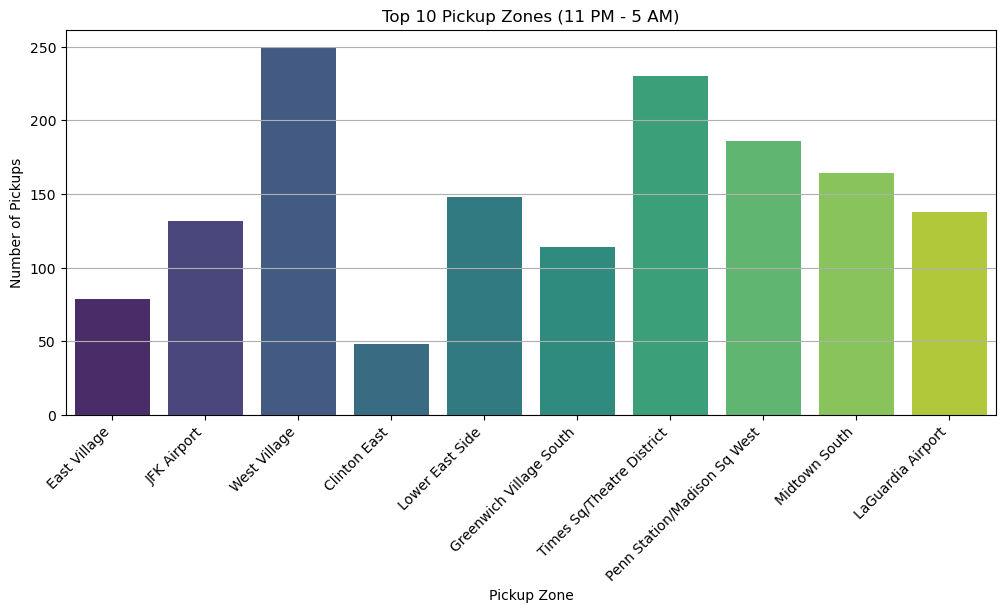

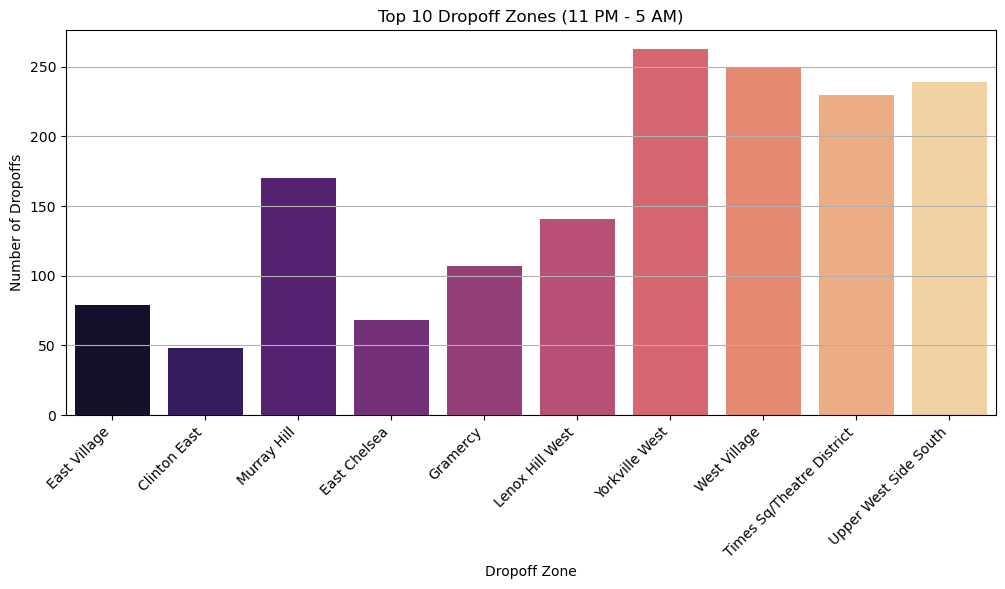

In [645]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter data for night hours (23:00 to 05:00)
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
night_df = df[(df["pickup_hour"] >= 23) | (df["pickup_hour"] <= 5)]

# Count pickups and dropoffs during night hours
night_pickup_counts = night_df["PULocationID"].value_counts()
night_dropoff_counts = night_df["DOLocationID"].value_counts()

# Get the top 10 zones for pickups and dropoffs
top_10_night_pickups = night_pickup_counts.nlargest(10)
top_10_night_dropoffs = night_dropoff_counts.nlargest(10)

# Display results
# Merge to add zone names
night_pickup_zones = top_10_night_pickups.reset_index().merge(
    zones, left_on="PULocationID", right_on="LocationID", how="left"
)[["zone", "PULocationID"]].set_index("zone")

night_dropoff_zones = top_10_night_dropoffs.reset_index().merge(
    zones, left_on="DOLocationID", right_on="LocationID", how="left"
)[["zone", "DOLocationID"]].set_index("zone")

# Plot top 10 night pickups
plt.figure(figsize=(12, 5))
sns.barplot(x=night_pickup_zones.index, y=night_pickup_zones["PULocationID"], palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Pickup Zone")
plt.ylabel("Number of Pickups")
plt.title("Top 10 Pickup Zones (11 PM - 5 AM)")
plt.grid(axis="y")
plt.show()

# Plot top 10 night dropoffs
plt.figure(figsize=(12, 5))
sns.barplot(x=night_dropoff_zones.index, y=night_dropoff_zones["DOLocationID"], palette="magma")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Dropoff Zone")
plt.ylabel("Number of Dropoffs")
plt.title("Top 10 Dropoff Zones (11 PM - 5 AM)")
plt.grid(axis="y")
plt.show()


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [651]:
# Filter for night hours (11 PM to 5 AM)
# Extract pickup hour
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour

# Define night and day hours
night_hours = (df["pickup_hour"] >= 23) | (df["pickup_hour"] <= 5)
day_hours = (df["pickup_hour"] >= 6) & (df["pickup_hour"] <= 22)

# Calculate revenue for night and day
night_revenue = df[night_hours]["total_amount"].sum()
day_revenue = df[day_hours]["total_amount"].sum()
total_revenue = df["total_amount"].sum()

# Compute revenue share percentages
night_revenue_share = (night_revenue / total_revenue) * 100
day_revenue_share = (day_revenue / total_revenue) * 100

# Display results
print(f"🔹 Nighttime Revenue Share (11 PM - 5 AM): {night_revenue_share:.2f}%")
print(f"🔹 Daytime Revenue Share (6 AM - 10 PM): {day_revenue_share:.2f}%")


🔹 Nighttime Revenue Share (11 PM - 5 AM): 12.04%
🔹 Daytime Revenue Share (6 AM - 10 PM): 87.96%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [657]:
# Analyse the fare per mile per passenger for different passenger counts
# df_filtered = df[df["trip_distance"] > 0].copy()

# Compute fare per mile
df["fare_per_mile"] = df["fare_amount"] / df["trip_distance"]

# Compute fare per mile per passenger
df["fare_per_mile_per_passenger"] = df["fare_per_mile"] / df["passenger_count"]

# Compute the average fare per mile per passenger for each passenger count
fare_analysis = df.groupby("passenger_count")["fare_per_mile_per_passenger"].mean().reset_index()

# Display results
print(fare_analysis)



   passenger_count  fare_per_mile_per_passenger
0              1.0                    10.932940
1              2.0                     6.422112
2              3.0                     3.871151
3              4.0                     4.392576
4              5.0                     1.732461
5              6.0                     1.370654
6              7.0                     1.308835
7              8.0                    23.945826
8              9.0                    76.098002


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

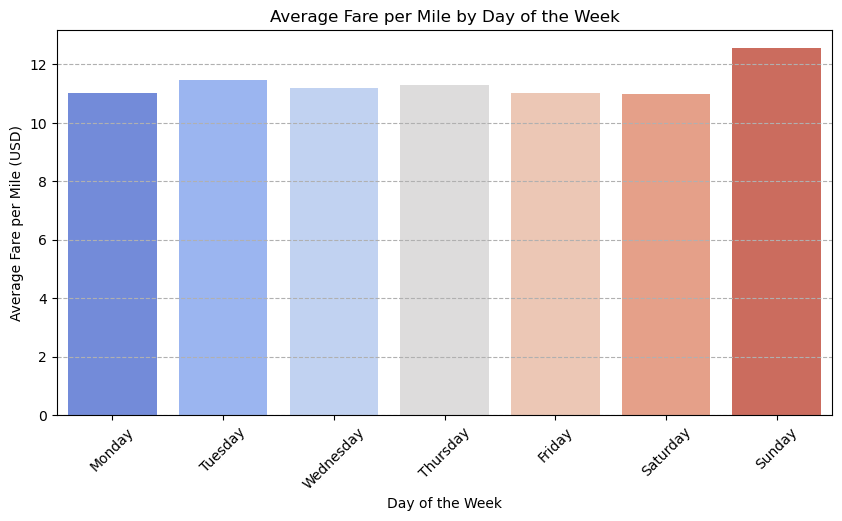

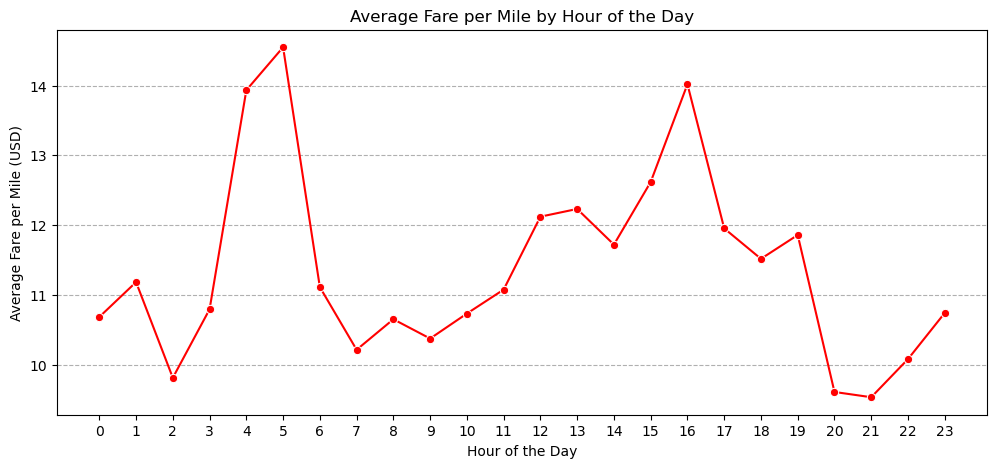

In [660]:
# Compare the average fare per mile for different days and for different times of the day
# Remove trips where trip_distance is zero to avoid division errors

# Compute fare per mile
df["fare_per_mile"] = df["fare_amount"] / df["trip_distance"]

# Extract day of the week and hour from pickup datetime
df["pickup_day"] = df["tpep_pickup_datetime"].dt.day_name()
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour

# Compute average fare per mile for each day of the week
fare_by_day = df.groupby("pickup_day")["fare_per_mile"].mean().reset_index()

# Compute average fare per mile for each hour of the day
fare_by_hour = df.groupby("pickup_hour")["fare_per_mile"].mean().reset_index()

# Set the order of days for proper visualization
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Plot: Average Fare per Mile by Day of the Week
plt.figure(figsize=(10, 5))
sns.barplot(x="pickup_day", y="fare_per_mile", data=fare_by_day, order=day_order, palette="coolwarm")
plt.xlabel("Day of the Week")
plt.ylabel("Average Fare per Mile (USD)")
plt.title("Average Fare per Mile by Day of the Week")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--")
plt.show()

# Plot: Average Fare per Mile by Hour of the Day
plt.figure(figsize=(12, 5))
sns.lineplot(x="pickup_hour", y="fare_per_mile", data=fare_by_hour, marker="o", color="red")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile (USD)")
plt.title("Average Fare per Mile by Hour of the Day")
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--")
plt.show()



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

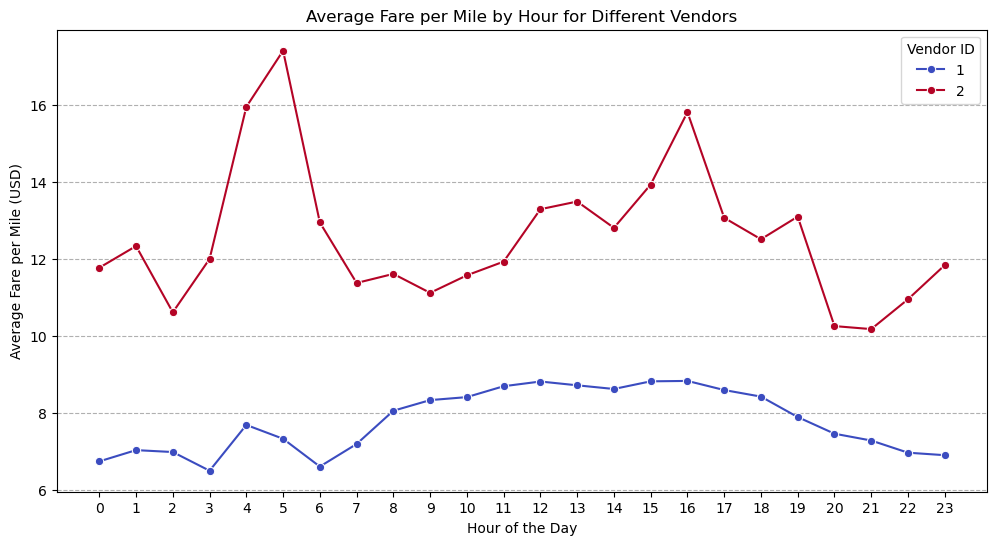

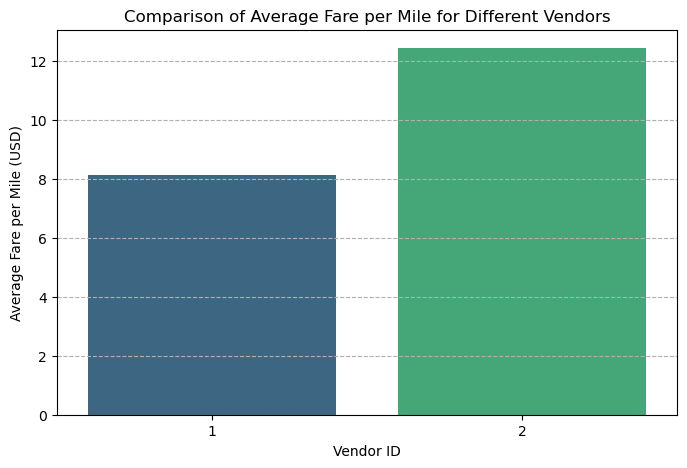

In [663]:
# Compare fare per mile for different vendors


df["fare_per_mile"] = df["fare_amount"] / df["trip_distance"]

df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour

fare_by_vendor_hour = df.groupby(["VendorID", "pickup_hour"])["fare_per_mile"].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.lineplot(x="pickup_hour", y="fare_per_mile", hue="VendorID", data=fare_by_vendor_hour, marker="o", palette="coolwarm")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile (USD)")
plt.title("Average Fare per Mile by Hour for Different Vendors")
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--")
plt.legend(title="Vendor ID")
plt.show()


fare_by_vendor = df.groupby("VendorID")["fare_per_mile"].mean().reset_index()


plt.figure(figsize=(8, 5))
sns.barplot(x="VendorID", y="fare_per_mile", data=fare_by_vendor, palette="viridis")
plt.xlabel("Vendor ID")
plt.ylabel("Average Fare per Mile (USD)")
plt.title("Comparison of Average Fare per Mile for Different Vendors")
plt.grid(axis="y", linestyle="--")
plt.show()



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


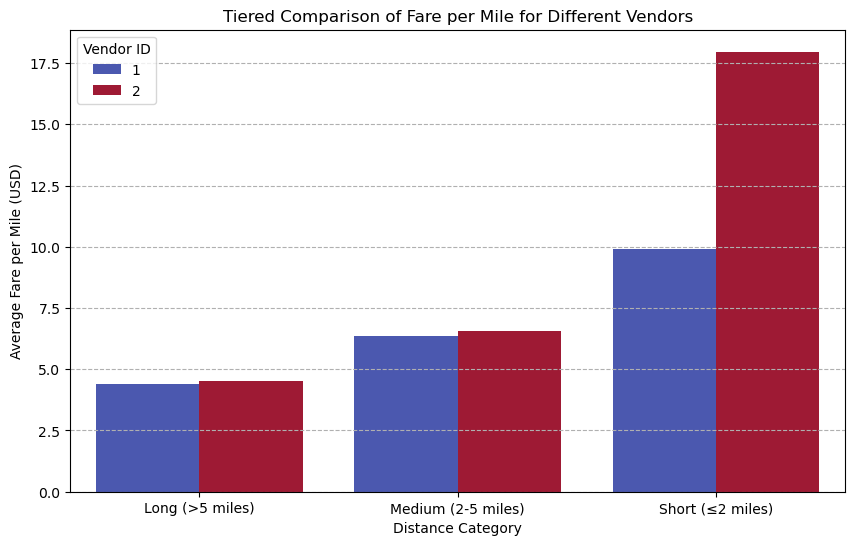

In [666]:
# Defining distance tiers



df["fare_per_mile"] = df["fare_amount"] / df["trip_distance"]


def categorize_distance(distance):
    if distance <= 2:
        return "Short (≤2 miles)"
    elif 2 < distance <= 5:
        return "Medium (2-5 miles)"
    else:
        return "Long (>5 miles)"


df["distance_category"] = df["trip_distance"].apply(categorize_distance)

fare_tiered = df.groupby(["VendorID", "distance_category"])["fare_per_mile"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x="distance_category", y="fare_per_mile", hue="VendorID", data=fare_tiered, palette="coolwarm")
plt.xlabel("Distance Category")
plt.ylabel("Average Fare per Mile (USD)")
plt.title("Tiered Comparison of Fare per Mile for Different Vendors")
plt.grid(axis="y", linestyle="--")
plt.legend(title="Vendor ID")
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

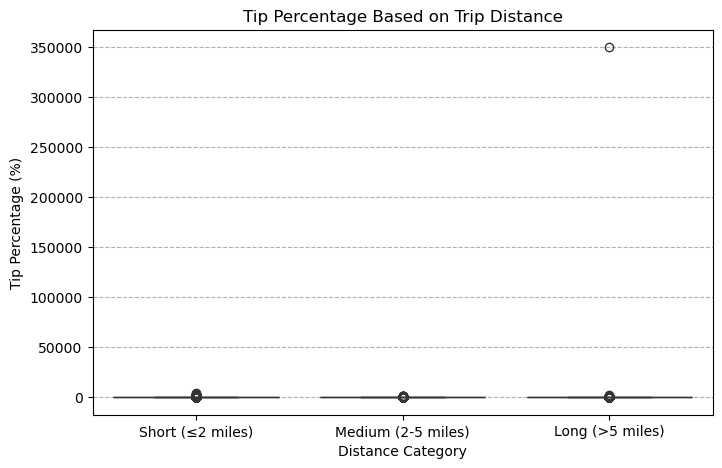

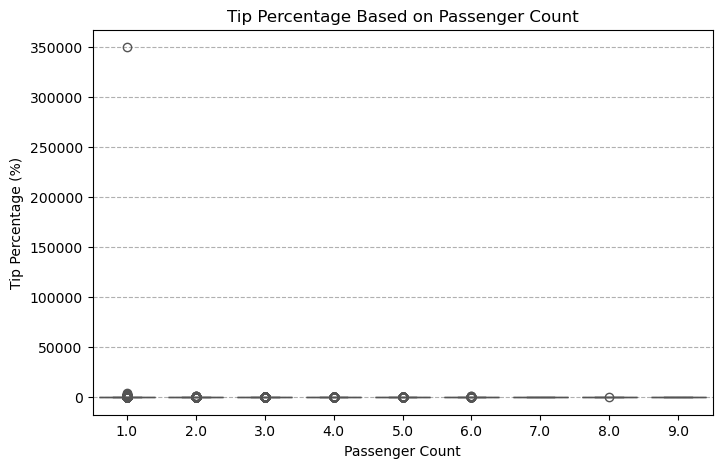

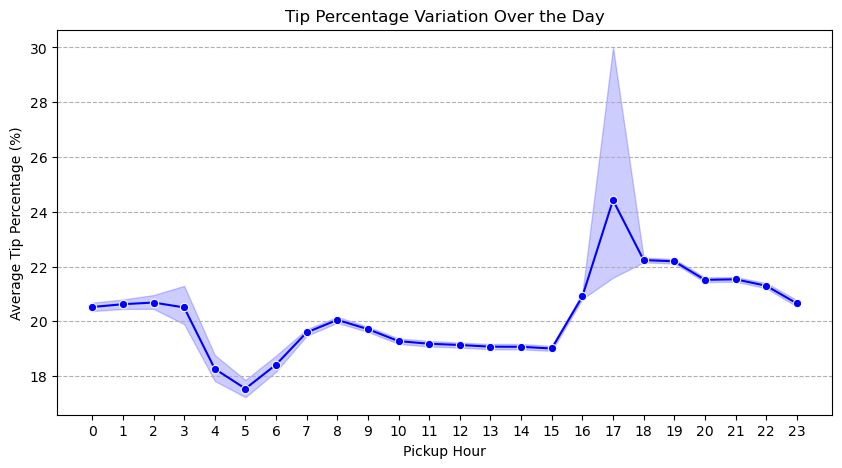

In [672]:
#  Analyze tip percentages based on distances, passenger counts and pickup times


df["tip_percentage"] = (df["tip_amount"] / df["fare_amount"]) * 100


def categorize_distance(distance):
    if distance <= 2:
        return "Short (≤2 miles)"
    elif 2 < distance <= 5:
        return "Medium (2-5 miles)"
    else:
        return "Long (>5 miles)"

df["distance_category"] = df["trip_distance"].apply(categorize_distance)


df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour


plt.figure(figsize=(8, 5))
sns.boxplot(x="distance_category", y="tip_percentage", data=df, palette="viridis")
plt.xlabel("Distance Category")
plt.ylabel("Tip Percentage (%)")
plt.title("Tip Percentage Based on Trip Distance")
plt.grid(axis="y", linestyle="--")
plt.show()


plt.figure(figsize=(8, 5))
sns.boxplot(x="passenger_count", y="tip_percentage", data=df, palette="coolwarm")
plt.xlabel("Passenger Count")
plt.ylabel("Tip Percentage (%)")
plt.title("Tip Percentage Based on Passenger Count")
plt.grid(axis="y", linestyle="--")
plt.show()


plt.figure(figsize=(10, 5))
sns.lineplot(x="pickup_hour", y="tip_percentage", data=df, marker="o", color="blue")
plt.xlabel("Pickup Hour")
plt.ylabel("Average Tip Percentage (%)")
plt.title("Tip Percentage Variation Over the Day")
plt.xticks(range(0, 24)) 
plt.grid(axis="y", linestyle="--")
plt.show()



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

           Avg Fare Amount  Avg Trip Distance  Avg Passenger Count
Tip < 10%        21.561258           3.921745             1.438081
Tip > 25%        14.433774           2.305715             1.369270


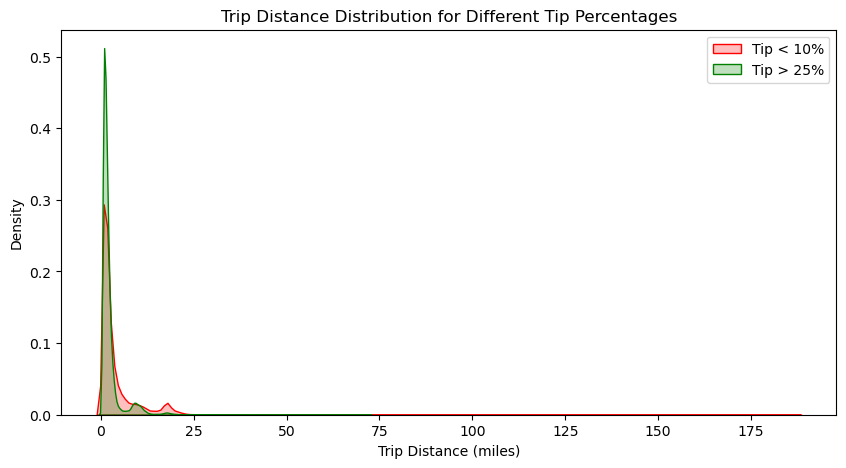

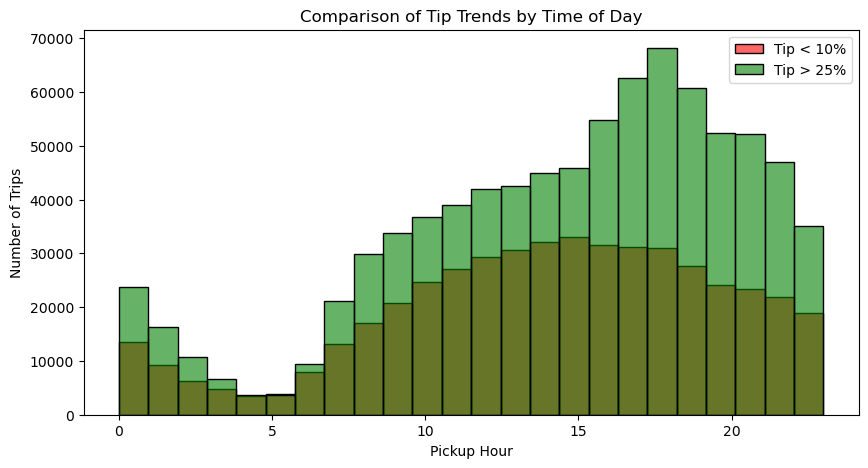

In [674]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%


low_tip_trips = df[df["tip_percentage"] < 10].copy()
high_tip_trips = df[df["tip_percentage"] > 25].copy()


comparison = pd.DataFrame({
    "Avg Fare Amount": [low_tip_trips["fare_amount"].mean(), high_tip_trips["fare_amount"].mean()],
    "Avg Trip Distance": [low_tip_trips["trip_distance"].mean(), high_tip_trips["trip_distance"].mean()],
    "Avg Passenger Count": [low_tip_trips["passenger_count"].mean(), high_tip_trips["passenger_count"].mean()]
}, index=["Tip < 10%", "Tip > 25%"])

print(comparison)


plt.figure(figsize=(10, 5))
sns.kdeplot(low_tip_trips["trip_distance"], label="Tip < 10%", shade=True, color="red")
sns.kdeplot(high_tip_trips["trip_distance"], label="Tip > 25%", shade=True, color="green")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Density")
plt.title("Trip Distance Distribution for Different Tip Percentages")
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
sns.histplot(low_tip_trips["pickup_hour"], bins=24, color="red", alpha=0.6, label="Tip < 10%")
sns.histplot(high_tip_trips["pickup_hour"], bins=24, color="green", alpha=0.6, label="Tip > 25%")
plt.xlabel("Pickup Hour")
plt.ylabel("Number of Trips")
plt.title("Comparison of Tip Trends by Time of Day")
plt.legend()
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

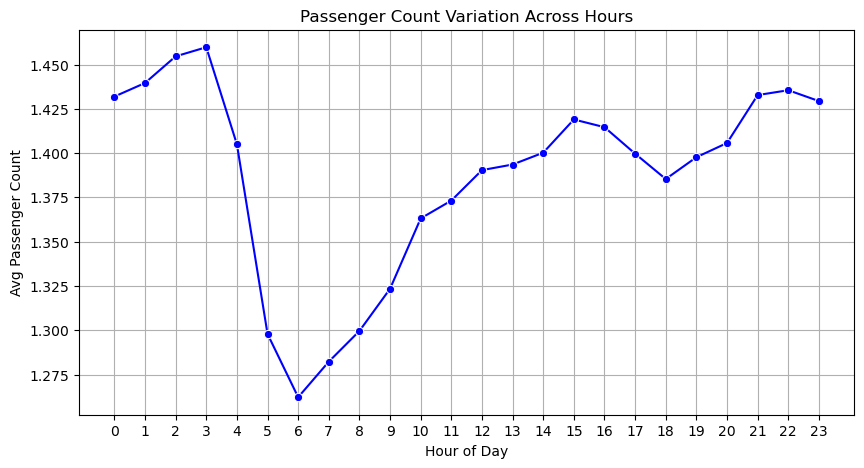

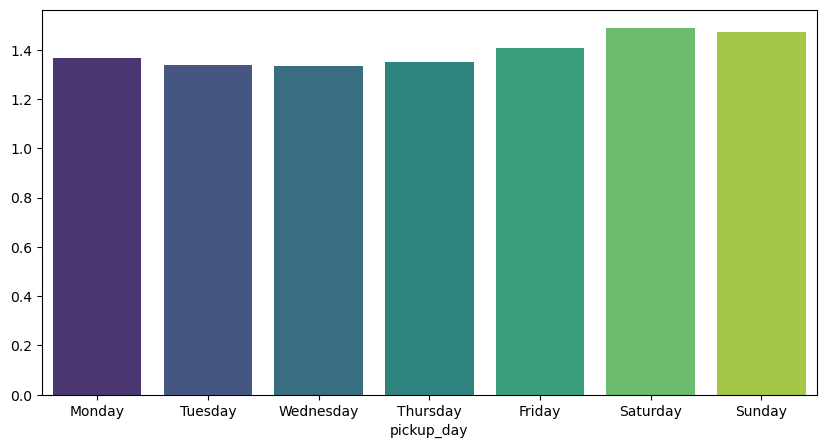

In [678]:
# See how passenger count varies across hours and days

hourly_passenger_count = df.groupby("pickup_hour")["passenger_count"].mean()


df["pickup_day"] = df["tpep_pickup_datetime"].dt.day_name()
daily_passenger_count = df.groupby("pickup_day")["passenger_count"].mean()


day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_passenger_count = daily_passenger_count.reindex(day_order)


plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_passenger_count.index, y=hourly_passenger_count.values, marker="o", color="blue")
plt.xlabel("Hour of Day")
plt.ylabel("Avg Passenger Count")
plt.title("Passenger Count Variation Across Hours")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

# Plot Daily Trend
plt.figure(figsize=(10, 5))
sns.barplot(x=daily_passenger_count.index, y=daily_passenger_count.values, palette="viridis")
plt.show()




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

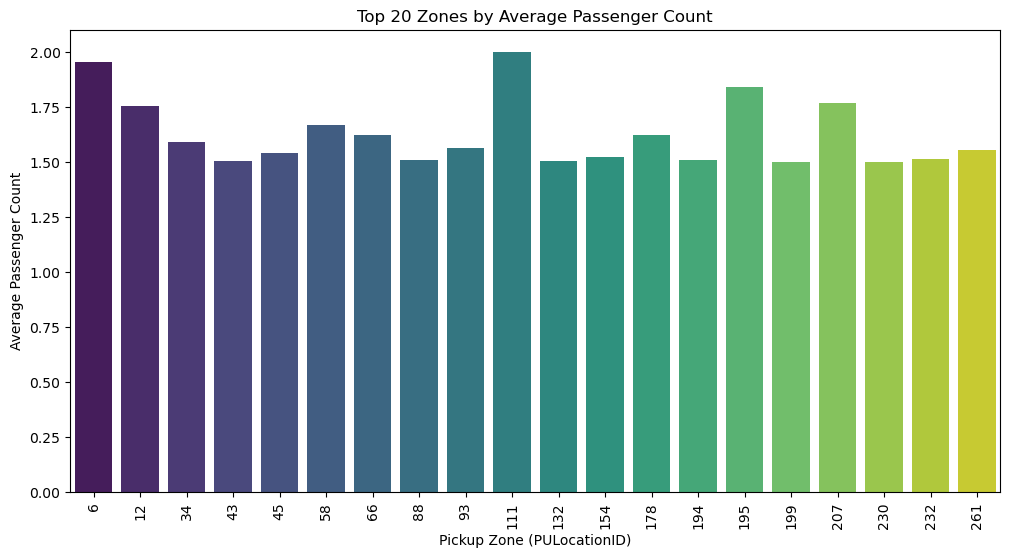

In [681]:
# How does passenger count vary across zones


zone_passenger_count = df.groupby("PULocationID")["passenger_count"].mean().reset_index()


zone_passenger_count = zone_passenger_count.sort_values(by="passenger_count", ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(data=zone_passenger_count.head(20), x="PULocationID", y="passenger_count", palette="viridis")

plt.xlabel("Pickup Zone (PULocationID)")
plt.ylabel("Average Passenger Count")
plt.title("Top 20 Zones by Average Passenger Count")
plt.xticks(rotation=90)
plt.show()


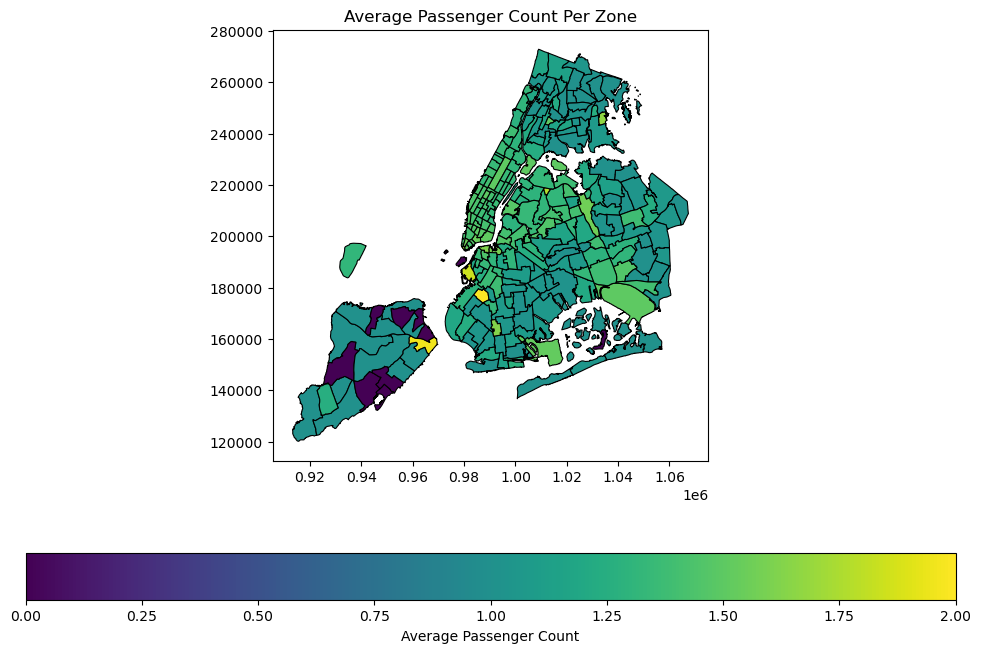

In [683]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame

zone_passenger_avg = df.groupby("PULocationID")["passenger_count"].mean().reset_index()

zone_passenger_avg.rename(columns={"passenger_count": "avg_passenger_count"}, inplace=True)

zones_with_trips = zones.merge(zone_passenger_avg, left_on="LocationID", right_on="PULocationID", how="left")

zones_with_trips["avg_passenger_count"].fillna(0, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
zones_with_trips.plot(column="avg_passenger_count", cmap="viridis", linewidth=0.8, edgecolor="black", 
                      legend=True, legend_kwds={'label': "Average Passenger Count", 'orientation': "horizontal"}, ax=ax)
plt.title("Average Passenger Count Per Zone")
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

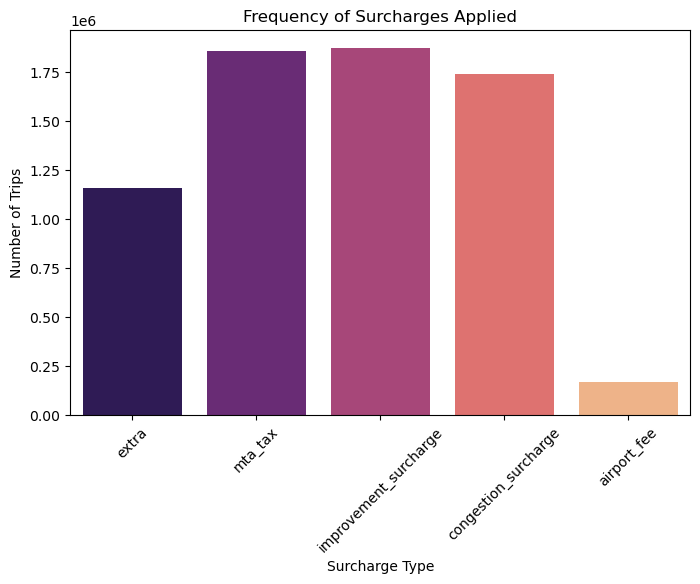

In [687]:
# How often is each surcharge applied?
surcharge_columns = ["extra", "mta_tax", "improvement_surcharge", "congestion_surcharge", "airport_fee"]

surcharge_counts = (df[surcharge_columns] > 0).sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=surcharge_counts.index, y=surcharge_counts.values, palette="magma")
plt.xlabel("Surcharge Type")
plt.ylabel("Number of Trips")
plt.title("Frequency of Surcharges Applied")
plt.xticks(rotation=45)
plt.show()




## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
High-Demand Areas
Taxis should be positioned in JFK Airport, Midtown Center, Upper East Side, LaGuardia Airport, Penn Station, and Times Square, where trip volumes are highest.

AND Q2 and Q4 have the highest trips.

Peak & Lean Hours
Busiest Hour: 6 PM – Highest demand.

Lean Hours: 2-4 AM – Lowest demand.
Action: Increase fleet during peak times, reduce idle taxis overnight.

Traffic Considerations
Avoid: Midtown South & Brooklyn Heights due to heavy congestion.
Action: Use alternative routes and encourage nearby drop-offs.

Weekday vs. Weekend Demand
Weekdays have more trips than weekends.
Action: Adjust fleet size accordingly and use surge pricing on weekdays.

Best Pickup & Dropoff Zones
Best Pickup Zones: East Elmhurst, JFK, LaGuardia (high pickup/dropoff ratio).

Best Dropoff Zones: Newark Airport, Breezy Point, Windsor Terrace (low pickup/dropoff ratio).
Action: Increase fleet in pickup-heavy areas, reposition taxis after drop-offs.

Nighttime Demand (11 PM - 5 AM)
Best Pickups: West Village, Times Square

Best Dropoffs: Yorkville West, West Village, Times Square
Action: Deploy more taxis in these zones and offer incentives for night drivers.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
Time-Based Strategy
Peak Hours (6 PM): Focus on Midtown, Times Square, and Penn Station.

Lean Hours (2-4 AM): Reduce fleet or shift focus to West Village, LaGuardia, and JFK for airport pickups.

Night Hours (10 PM - 3 AM): Increased passenger count; focus on entertainment districts like West Village, Times Square, and Midtown Center.

Day-Based Strategy
Weekdays: More demand in Midtown and business districts due to work commutes.

Weekends: High demand in entertainment and nightlife zones like Times Square, West Village, and Penn Station.

Quarter-Based Strategy
Q2 and Q4 have the highest trip volumes, suggesting increased demand during spring and winter months.
Action: Scale fleet size accordingly to handle seasonal peaks.



**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
Increase Airport Fees

Since most pickups occur at airports (JFK, LaGuardia), implement a higher airport surcharge to maximize revenue.

Peak Hour Surge Pricing (6 PM - 9 PM)

Apply surge charges during peak hours (6 PM) when demand is highest to optimize earnings.

Nighttime Fare Adjustment (10 PM - 3 AM)

Due to high passenger count during late-night hours, slightly increase fares, as passengers can split the cost among themselves.